<a href="https://colab.research.google.com/github/peculab/DFTDescriptorPipeline/blob/main/examples/indigo_aryl_alkyl/indigo_aryl_alkyl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf /usr/local/lib/python3.11/dist-packages/descriptors

In [2]:
# ✅ Reset environment
%cd /content
import shutil, os, sys, importlib

# 🔁 Uninstall pip-installed descriptors
!pip uninstall -y descriptors

# 🔥 Clear cached modules
for k in list(sys.modules.keys()):
    if k.startswith("descriptors"):
        del sys.modules[k]

# 🧹 Remove previous repo
if os.path.exists("DFTDescriptorPipeline"):
    shutil.rmtree("DFTDescriptorPipeline")

/content


In [3]:
# ✅ Install required packages
!pip install morfeus-ml scikit-learn joblib matplotlib openpyxl

# ✅ Clone the latest repo
!git clone https://github.com/peculab/DFTDescriptorPipeline.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.0/95.0 kB 2.8 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=464e52cfca0b3b063ac4bccb5607538dc73076d4af8758eff5baa6b0bfdaabee
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire
Cloning into 'DFTDescriptorPipeline'...
remote: Enumerating objects: 630, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 630 (delta 32), reused 3 (delta 3), pack-reused 567 (from 1)
Receiving objects: 100% (630/630), 35.86 MiB | 22.09 MiB/s, done.
Resolving deltas: 100% (378/378), done.
Updating files: 100% (96/96), done.


In [4]:
# ✅ Set module path
from morfeus import read_xyz, Sterimol
from morfeus.utils import get_radii

import shutil, os, sys, importlib
sys.path.insert(0, "/content/DFTDescriptorPipeline/descriptors")
import extractor_regr
import glob, os
importlib.reload(extractor_regr)

<module 'extractor_regr' from '/content/DFTDescriptorPipeline/descriptors/extractor_regr.py'>

In [5]:
data_dir = "/content/DFTDescriptorPipeline/examples/indigo_aryl_alkyl"
xlsx_path = glob.glob(os.path.join(data_dir, "*.xlsx"))[0]
log_folder = os.path.join(data_dir, "logfiles")

In [6]:
import pandas as pd

modified_xlsx_path = "/content/DFTDescriptorPipeline/examples/azoarene/Azoarene_with_Ar.xlsx"

df = pd.read_excel(xlsx_path)

In [7]:
df

,Entry,Ar1,Compound,Unnamed: 3,kobs_MeCN,ln(kobs)_MeCN,kobs_toluene,ln(kobs)_toluene,L_C1-C2,Occupancy_C1-O,...,polarizability,Ster_L,Ster_B1,Ster_B5,Ar_NBO_C1,Ar_NBO_C2,Ar_NBO_=O,Ar_NBO_-O,Ar_I_C=O,Ar_v_C=O
0,1,CYH-191-A,PGOH-33,4-pyridine,0.0816,-2.505926,0.0315,-3.457768,1.49120,1.99461,...,81.547333,5.74,1.70,3.22,0.802,-0.141,-0.588,-0.696,343.9081,1859.57
1,2,CYH-196-A,PGOH-09,4-CO2Me,0.1754,-1.740686,0.0704,-2.653562,1.48833,1.99453,...,121.686333,9.37,1.89,3.35,0.803,-0.159,-0.596,-0.699,298.9440,1851.44
2,3,CYH-206-A,PGOH-13,4-NO2,0.0862,-2.451085,0.0465,-3.068303,1.49096,1.99317,...,105.616333,7.72,1.70,3.23,0.802,-0.148,-0.588,-0.696,370.6431,1857.10
3,4,CYH-209-A,PGOH-14,4-CF3,0.1748,-1.744113,0.0689,-2.675099,1.48905,1.99440,...,101.253000,7.75,2.17,3.22,0.804,-0.159,-0.593,-0.698,375.6318,1854.42
4,5,CYH-208-A,PGOH-16,4-Ph,0.2628,-1.336362,0.0907,-2.400198,1.48338,1.99309,...,164.862000,10.61,1.70,3.24,0.807,-0.074,-0.610,-0.707,465.2161,1844.58
5,6,CYH-217-A,PGOH-19,4-CHO,0.1512,-1.889152,0.0843,-2.473373,1.48950,1.99453,...,105.074667,7.80,1.70,3.24,0.802,-0.152,-0.594,-0.697,212.6175,1851.91
6,7,CYH-219-A,PGOH-21,benzofuran,0.5356,-0.624368,0.1708,-1.767262,1.48284,1.99447,...,114.194000,7.73,1.70,4.26,0.807,-0.192,-0.607,-0.704,443.2582,1843.97
7,8,CYH-220-A,PGOH-20,3-phth,0.1825,-1.701005,0.0711,-2.643668,1.48677,1.99448,...,195.570667,9.03,1.70,8.74,0.807,-0.169,-0.601,-0.697,440.9969,1848.30
8,9,CYH-242-A,PGOH-25,4-alkene,0.4249,-0.855901,0.1447,-1.933093,1.48546,1.99298,...,159.631000,11.48,1.98,3.31,0.822,-0.200,-0.606,-0.705,380.0807,1846.89
9,10,CYH-243-A,PGOH-24,4-OCF3,0.2442,-1.409768,0.1104,-2.203645,1.48320,1.99457,...,107.261667,9.17,2.01,3.62,0.805,-0.204,-0.601,-0.701,403.8310,1848.72


In [8]:
df = df.rename(columns={"Ar1": "Ar"})

df.to_excel(modified_xlsx_path, index=False)


[STEP1] Read Excel: /content/DFTDescriptorPipeline/examples/azoarene/Azoarene_with_Ar.xlsx

[STEP2] Extracting log features for each unique Ar...

==== [1/20] [CYH-191-A] Processing log: /content/DFTDescriptorPipeline/examples/indigo_aryl_alkyl/logfiles/CYH-191-A.log ====
Found C1: 7, C2: 1, A: 9, B: 14, D: 8, F: 2, G: 6

==== [2/20] [CYH-196-A] Processing log: /content/DFTDescriptorPipeline/examples/indigo_aryl_alkyl/logfiles/CYH-196-A.log ====
Found C1: 11, C2: 1, A: 13, B: 21, D: 12, F: 2, G: 6

==== [3/20] [CYH-206-A] Processing log: /content/DFTDescriptorPipeline/examples/indigo_aryl_alkyl/logfiles/CYH-206-A.log ====
Found C1: 7, C2: 1, A: 9, B: 17, D: 8, F: 2, G: 2

==== [4/20] [CYH-209-A] Processing log: /content/DFTDescriptorPipeline/examples/indigo_aryl_alkyl/logfiles/CYH-209-A.log ====
Found C1: 7, C2: 1, A: 9, B: 18, D: 8, F: 2, G: 2

==== [5/20] [CYH-208-A] Processing log: /content/DFTDescriptorPipeline/examples/indigo_aryl_alkyl/logfiles/CYH-208-A.log ====
Found C1: 7, C2

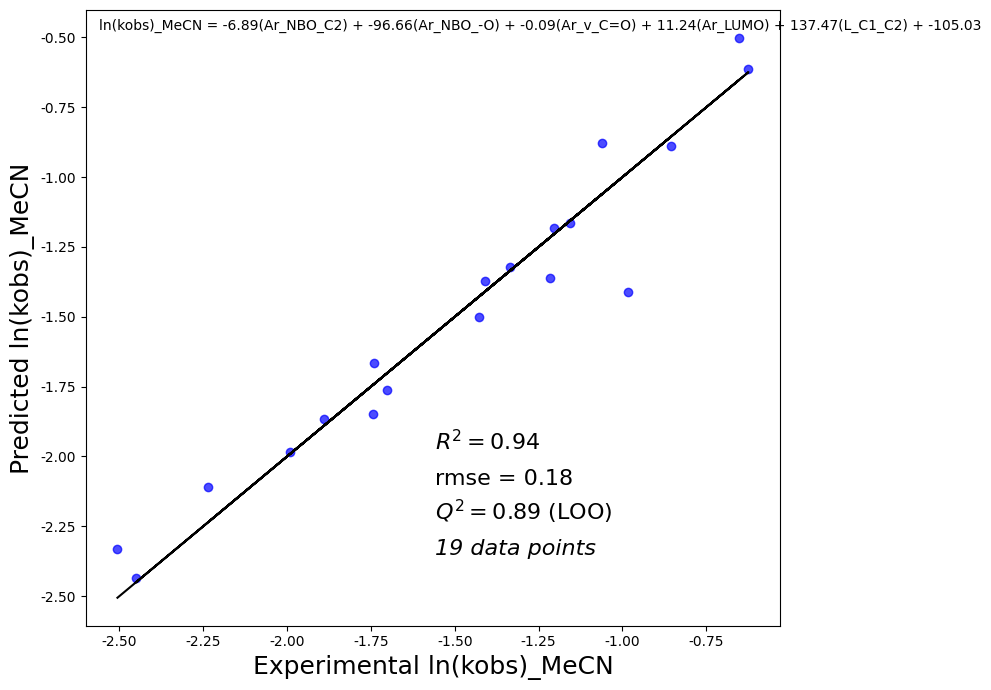


✅ Analysis complete!


In [9]:
# One click execution
df, results, best_model = extractor_regr.run_full_pipeline(
    log_folder=log_folder,
    xlsx_path=modified_xlsx_path,
    target='ln(kobs)_MeCN',
    auto_pairing=False,
)